In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # visualization librabry
import matplotlib.pyplot as plt # visualization library
from chart_studio.plotly import plot, iplot
import plotly.graph_objs as go # plotly graphical object
import warnings # import warnings lib
warnings.filterwarnings('ignore') # if theres a warning after some codes, this will avoid us to see them
plt.style.use('ggplot') # style of plots

In [11]:
# bombing data
aerial = pd.read_csv('operations.csv')
aerial

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
1,2,8/15/1943,PTO,USA,5 AF,400 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,9366.0
2,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
3,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN
4,5,8/15/1943,PTO,USA,5 AF,321 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,22585.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178276,178738,2/16/1945,CBI,USA,10 AF,89 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,35815.0
178277,178739,2/16/1945,CBI,USA,10 AF,90 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,35020.0
178278,178740,2/16/1945,CBI,USA,10 AF,90 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,35022.0
178279,178741,2/16/1945,PTO,NEW ZEALAND,RNZAF,NO. 22 SQUADRON RNZAF,F4U,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8000.0,4.0,NaN,NaN,NaN


In [12]:
aerial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178281 entries, 0 to 178280
Data columns (total 46 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Mission ID                             178281 non-null  int64  
 1   Mission Date                           178281 non-null  object 
 2   Theater of Operations                  175123 non-null  object 
 3   Country                                126494 non-null  object 
 4   Air Force                              126444 non-null  object 
 5   Unit ID                                50913 non-null   object 
 6   Aircraft Series                        178165 non-null  object 
 7   Callsign                               21 non-null      object 
 8   Mission Type                           47186 non-null   object 
 9   Takeoff Base                           3383 non-null    object 
 10  Takeoff Location                       3338 non-null    

In [13]:
weather_station_location = pd.read_csv('Weather Station Locations.csv')
weather_station_location.head()

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


In [17]:
weather = pd.read_csv('Summary of Weather.csv')
weather.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WBAN              161 non-null    int64  
 1   NAME              161 non-null    object 
 2   STATE/COUNTRY ID  161 non-null    object 
 3   LAT               161 non-null    object 
 4   LON               161 non-null    object 
 5   ELEV              161 non-null    int64  
 6   Latitude          161 non-null    float64
 7   Longitude         161 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 10.2+ KB


### Data Cleaning

In [15]:
# drop countries that are NaN
aerial = aerial[pd.isna(aerial.Country)==False]

# drop if target longitude is NaN
aerial = aerial[pd.isna(aerial['Target Longitude'])==False]

# drop if takeoff longitude is NaN
aerial = aerial[pd.isna(aerial['Takeoff Longitude'])==False]

# drop unsed features
drop_list = ['Mission ID','Unit ID','Target ID','Altitude (Hundreds of Feet)','Airborne Aircraft',
             'Attacking Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
             'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
             'High Explosives', 'High Explosives Type','Mission Type',
             'High Explosives Weight (Pounds)', 'High Explosives Weight (Tons)',
             'Incendiary Devices', 'Incendiary Devices Type',
             'Incendiary Devices Weight (Pounds)',
             'Incendiary Devices Weight (Tons)', 'Fragmentation Devices',
             'Fragmentation Devices Type', 'Fragmentation Devices Weight (Pounds)',
             'Fragmentation Devices Weight (Tons)', 'Total Weight (Pounds)',
             'Total Weight (Tons)', 'Time Over Target', 'Bomb Damage Assessment','Source ID']

aerial.drop(drop_list, axis=1, inplace=True)
aerial = aerial[aerial.iloc[:,8]!='4248'] # drop this takeoff latitude
aerial = aerial[aerial.iloc[:,9]!='1355'] # drop this takeoff longitude

In [19]:
# what we will only use
weather = weather.loc[:,['STA', 'Date', 'MeanTemp']]
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Date      119040 non-null  object 
 2   MeanTemp  119040 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ MB


### Data Visualization

Country
USA              1895
GREAT BRITAIN     902
NEW ZEALAND       102
SOUTH AFRICA       14
Name: count, dtype: int64


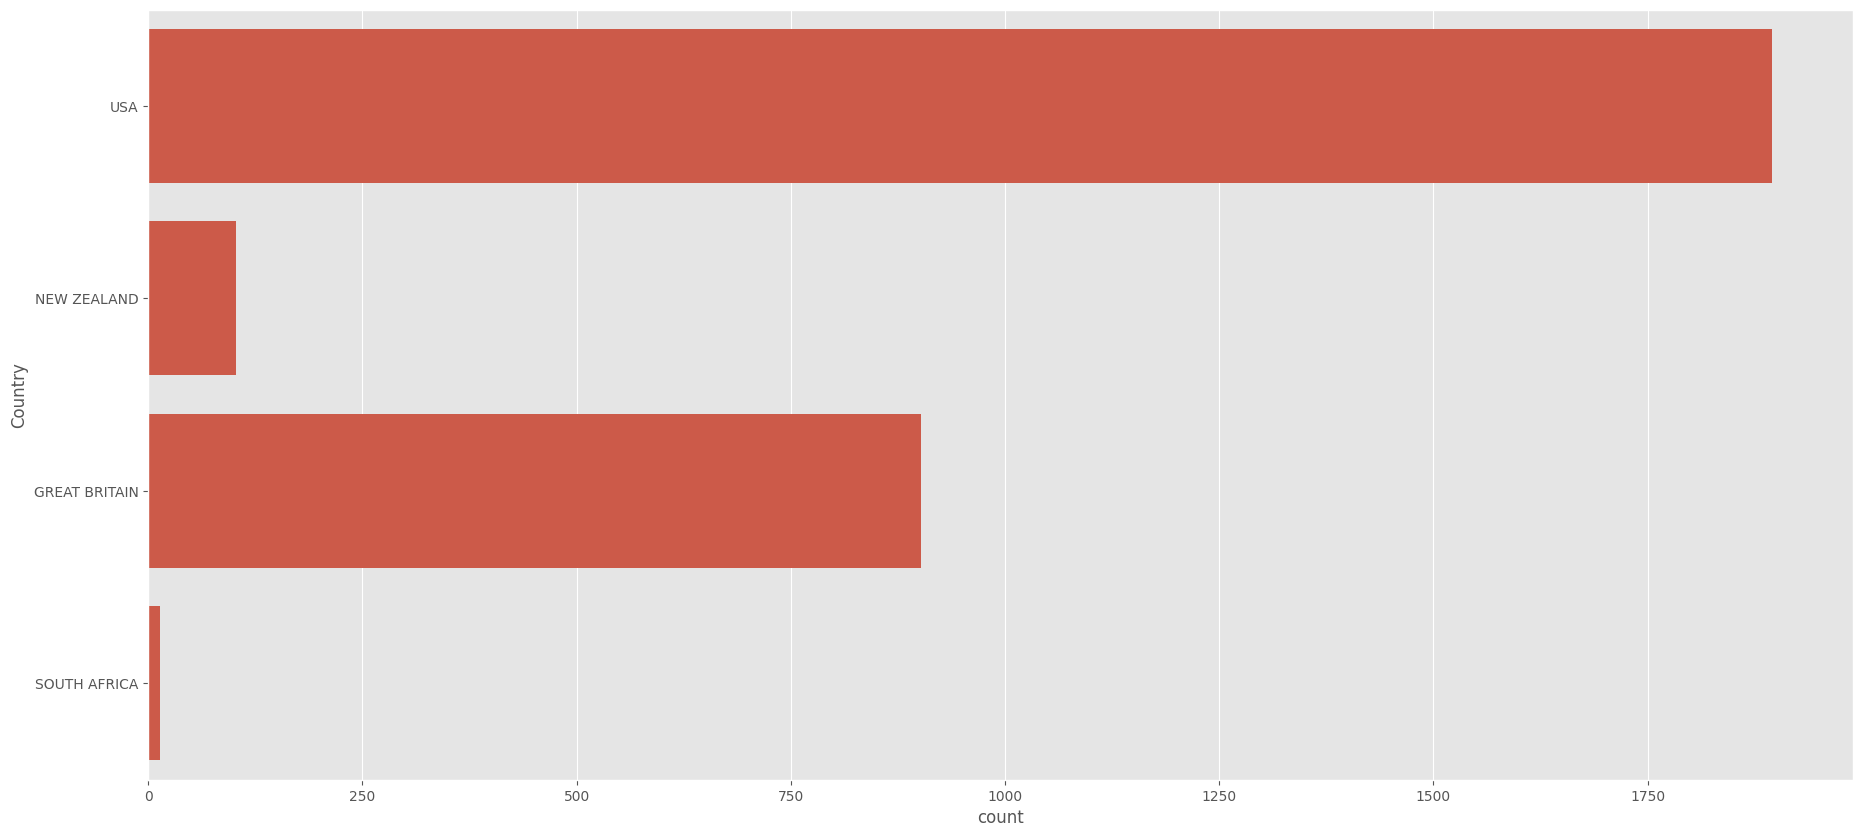

In [20]:
# country
print(aerial['Country'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(aerial['Country'])
plt.show()

Target Country
ITALY      1113
BURMA       335
LIBYA       272
GREECE      221
TUNISIA     113
EGYPT        80
JAPAN        71
CHINA        52
SICILY       46
GERMANY      41
Name: count, dtype: int64


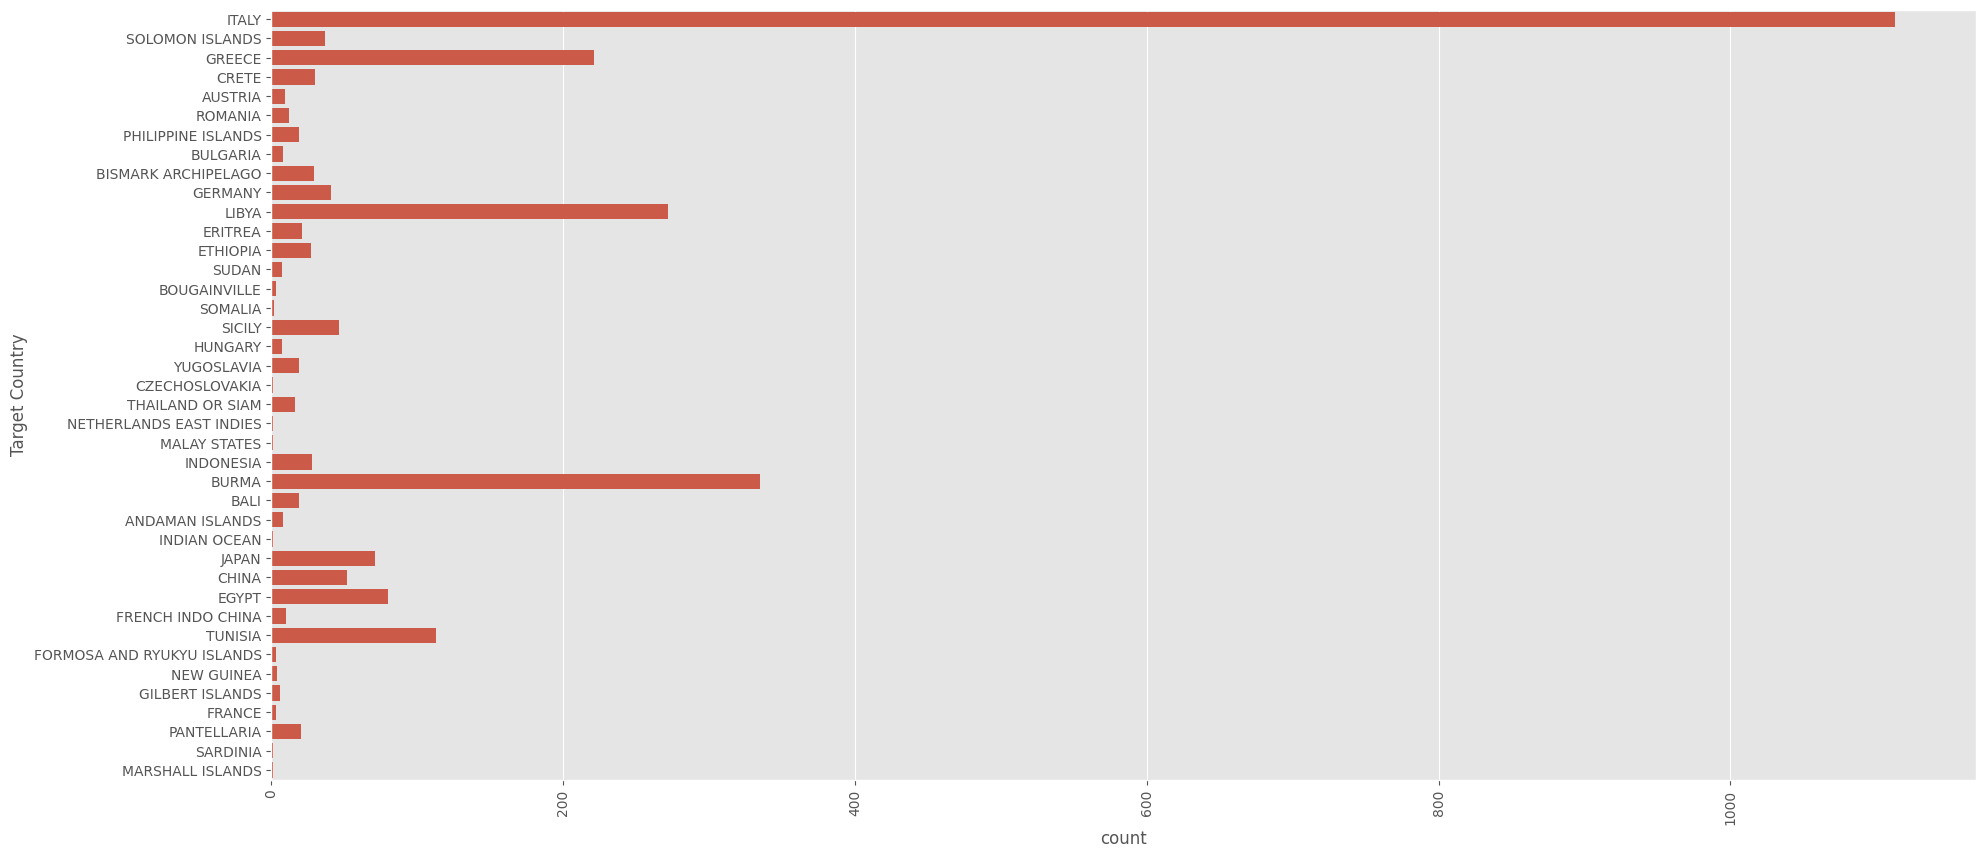

In [21]:
# top target countries
print(aerial['Target Country'].value_counts()[:10])
plt.figure(figsize=(22,10))
sns.countplot(aerial['Target Country'])
plt.xticks(rotation=90)
plt.show()

In [24]:
import plotly.graph_objects as go
from plotly.offline import plot

# Aircraft Series
data = aerial['Aircraft Series'].value_counts()
print(data[:10])

# Criando o gráfico de barras
bar_data = go.Bar(
    x=data[:10].index,
    y=data[:10].values,
    hoverinfo='text',
    marker=dict(
        color='rgba(177, 14, 22, 0.5)',
        line=dict(color='rgb(0,0,0)', width=1.5)
    )
)

layout = go.Layout(
    title='Aircraft Series'
)

fig = go.Figure(data=[bar_data], layout=layout)

# Renderizando o gráfico offline
plot(fig, filename="aircraft_series.html", auto_open=True)


Aircraft Series
A36             990
LIB             503
B25             416
B24             337
BLEN            180
WELL            129
B17             119
PV-1 VENTURA     70
WHIT             32
HALI             18
Name: count, dtype: int64


'aircraft_series.html'

In [25]:
# ATTACK
aerial["color"] = ""
aerial.color[aerial.Country == "USA"] = "rgb(0,116,217)"
aerial.color[aerial.Country == "GREAT BRITAIN"] = "rgb(255,65,54)"
aerial.color[aerial.Country == "NEW ZEALAND"] = "rgb(133,20,75)"
aerial.color[aerial.Country == "SOUTH AFRICA"] = "rgb(255,133,27)"

data = [dict(
    type='scattergeo',
    lon = aerial['Takeoff Longitude'],
    lat = aerial['Takeoff Latitude'],
    hoverinfo = 'text',
    text = "Country: " + aerial.Country + " Takeoff Location: "+aerial["Takeoff Location"]+" Takeoff Base: " + aerial['Takeoff Base'],
    mode = 'markers',
    marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size= 10 ,
        line = dict(width=1,color = "white"),
        color = aerial["color"],
        opacity = 0.7),
)]
layout = dict(
    title = 'Countries Take Off Bases ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='Mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

ValueError: 
    Invalid value of type 'builtins.str' received for the 'type' property of layout.geo.projection
        Received value: 'Mercator'

    The 'type' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            ['airy', 'aitoff', 'albers', 'albers usa', 'august',
            'azimuthal equal area', 'azimuthal equidistant', 'baker',
            'bertin1953', 'boggs', 'bonne', 'bottomley', 'bromley',
            'collignon', 'conic conformal', 'conic equal area', 'conic
            equidistant', 'craig', 'craster', 'cylindrical equal
            area', 'cylindrical stereographic', 'eckert1', 'eckert2',
            'eckert3', 'eckert4', 'eckert5', 'eckert6', 'eisenlohr',
            'equal earth', 'equirectangular', 'fahey', 'foucaut',
            'foucaut sinusoidal', 'ginzburg4', 'ginzburg5',
            'ginzburg6', 'ginzburg8', 'ginzburg9', 'gnomonic',
            'gringorten', 'gringorten quincuncial', 'guyou', 'hammer',
            'hill', 'homolosine', 'hufnagel', 'hyperelliptical',
            'kavrayskiy7', 'lagrange', 'larrivee', 'laskowski',
            'loximuthal', 'mercator', 'miller', 'mollweide', 'mt flat
            polar parabolic', 'mt flat polar quartic', 'mt flat polar
            sinusoidal', 'natural earth', 'natural earth1', 'natural
            earth2', 'nell hammer', 'nicolosi', 'orthographic',
            'patterson', 'peirce quincuncial', 'polyconic',
            'rectangular polyconic', 'robinson', 'satellite', 'sinu
            mollweide', 'sinusoidal', 'stereographic', 'times',
            'transverse mercator', 'van der grinten', 'van der
            grinten2', 'van der grinten3', 'van der grinten4',
            'wagner4', 'wagner6', 'wiechel', 'winkel tripel',
            'winkel3']

### Time Series Prediction with ARIMA

- We will use most used method ARIMA
- ARIMA: AutoRegressive Intengrated Moving Average. I will explain it detailed at next parts.
- The way that we will follow:
    - What is Time Series?
    - Stationary of a Time Series
    - Make a Time Series Stationary?
    - Forecasting a Time Series

# What is Time Series?

- Time series is a collection of data points that are collected at constant time intervals.
- It is time dependent.
- Most of time series have some form of seasonality trends. For example, if we sale ice cream, most probably there will be higher sales in summer seasons. Therefore, this time series has seasonality trends.
- Another example, lets think we dice one time every day during 1 year. As you guess, there will be no scenario like that number six is appeared mostly in summer season or number five is mostly appeared in January. Therefore, this time series does not have seasonality trends.

### Stationary of a Time Series

- There are 3 basic criterion for a time series to understand whether it is stationary series or not.
    - Statistical properties of a time series such as mean, variance should remain constant over time to call time series is stationary:
        - constant mean
        - constant variance
        - autocovariance that does not depend on time. Autocovariance is covariance between time series and lagged time series
    
    - Lets visualize and check seasonality trend of our time series

In [ ]:
# Mean temperature of Bindikuri area
plt.figure(figsize=(22,10))
plt.plot(weather_bin)